# Differential expression analysis


You have run the nf-core/rnaseq pipeline and checked the first quality control metrics of your fastq files. This was, however, only the primary analysis and we want to take it further.

Due to the computational demand of the pipeline, you only ran the pipeline on two of the 16 samples in the study yesterday. We provide you an essential output of nf-core/rnaseq pipeline in the `data` folder: It contains the combined epression matrix as produced by Salmon, which provides transcript levels for each gene (rows) and each sample (columns).


We would now like to understand exactly the difference between the expression in our groups of mice. 
Which pipeline would you use for this?

differentialabundance

Have a close look at the pipeline's "Usage" page on the [nf-core docs](nf-co.re). You will need to create a samplesheet (based on the column names in the provided matrix).

In [6]:
# I missed this step in the course and am not sure which files to use to do this. Going forward, I used the samplesheet_solution.csv file provided by you.

Please paste here the command you used. You may need to inspect the provided expression matrix more closely and create additional files, like a samplesheet (based on the column names) or a contrast file (there happens to also be one in `data/` that you can use).

In [3]:
 !nextflow run nf-core/differentialabundance \
     --input data/samplesheet_solution.csv \
     --contrasts data/contrasts.csv \
     --matrix data/salmon.merged.gene_counts.tsv \
     --outdir differentialabundance_out  \
     -profile rnaseq,docker \
     -r 1.5.0

Nextflow 25.04.8 is available - Please consider updating your version to it

 N E X T F L O W   ~  version 25.04.7

Launching `https://github.com/nf-core/differentialabundance` [sleepy_cantor] DSL2 - revision: 3dd360fed0 [1.5.0]

WARN: Access to undefined parameter `monochromeLogs` -- Initialise it to a default value eg. `params.monochromeLogs = some_value`


------------------------------------------------------
                                        ,--./,-.
        ___     __   __   __   ___     /,-._.--~'
  |\ | |__  __ /  ` /  \ |__) |__         }  {
  | \| |       \__, \__/ |  \ |___     \`-._,-`-,
                                        `._,._,'
  nf-core/differentialabundance v1.5.0-g3dd360f
------------------------------------------------------
Core Nextflow options
  revision                    : 1.5.0
  runName                     : sleepy_cantor
  containerEngine             : docker
  container                   : [RMARKDOWNNOTEBOOK:biocontainers/r-shinyngs:1.8.8--r43hdfd

Explain all the parameters you set and why you set them in this way. If you used or created additional files as input, explain what they are used for.

--input data/samplesheet_solution.csv: the samplesheet specifying which samples to look at 
--contrasts data/contrasts.csv: Specifies which conditions to compare
--matrix data/salmon.merged.gene_counts.tsv: Results from rnaseq, detailing transcription levels per gene
--outdir differentialabundance_out: Output directory
-profile rnaseq,docker: Profile with which to run the pipeline
-r 1.5.0: Version of the pipeline


What were the outputs of the pipeline?

Plots, a shinyngs_app and a html report. Also, pipeline info is collected.

Would you exclude any samples? If yes, which and why?

If any, it would be SNI_Sal_4 and SNI_Sal_2. They appear to be outliers in the PCA (image below) form their own separate cluster in hierachical clustering (html report), even though outlier detection (html report) does not mark them as outliers. 

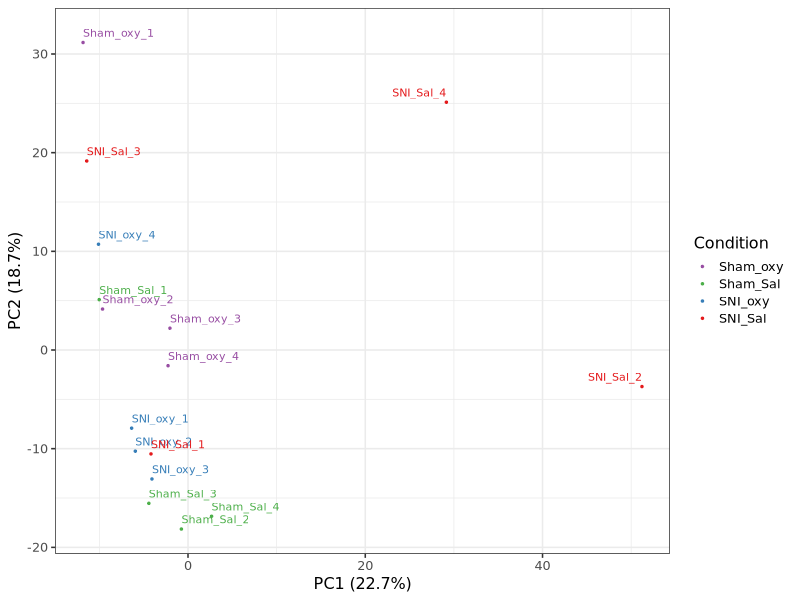

In [5]:
from IPython.display import Image
Image("./differentialabundance_out/plots/exploratory/Condition/png/pca2d.png")

How many genes were differentially expressed in each contrast? Does this confirm what the paper mentions?

SNI_Oxy vs SNI_Sal: 18
Sham_oxy vs Sham_sal: 7

The paper mentions a larger number of differentially expressed genes (see figure 3, b,e,h)

The paper mentions differentially expressed genes in three brain regions : the NAc, mPFC and VTA. Briefly explain what these 3 regions are.

NAc: Nucleus Accumbens

- Located in the forbrain, central to the brains reward circuit. It integrates input from the VTA and the prefrontal cortex
- Is involved in motivation, learning and addiction mechanisms.

mPFC: Medial Prefrontal Cortex

- It is located in the frontal lobe and is involve decision-making, attention and emotional regulation.

VTA: Ventral Tegmental Area

- Located in the midbrain, contains dopaminergic neurons that project to the NAc and mPFC (the mesocorticolimbic dopamine pathway).
- It is involved in motivation and learning

Is there anyway from the paper and the material and methods for us to know which genes are included in these regions?

The whole DEG list might be in the supplementary files

Once you have your list of differentially expressed genes, do you think just communicating those to the biologists would be sufficient? What does the publication state?

No, simply passing on the DEGs is not enough, because a DEG list alone does not reveal any biological significance.

In the publication, the authors performed Gene Ontology, IPA, and upstream regulator analyses to interpret the data functionally. 


Please reproduce the Venn Diagram from Figure 3, not taking into account the brain regions but just the contrasts mentionned.